In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
def load_images_from_folder(folder_path,type):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(('.png', '.jpg', '.jpeg')):
            image = Image.open(img_path)

            image = cv2.imread(img_path)


        # Convert to color (RGB)


            images.append(image)
            # Assigning labels based on your criteria, modify as needed
            if type ==1:
                labels.append(0)  # Example: Assign label 0 for cat
            elif type==2:
                labels.append(1)  # Example: Assign label 1 for dog
            elif type==3:
                labels.append(2)

            else:
                labels.append(-1)  # Unknown label

    return np.array(images), np.array(labels)

In [ ]:
dataset_folder = '/content/drive/MyDrive/cropped_images_damaged_earthpro_resized'
target_pixels = 30000
darkness_threshold = 120
# Load images and labels
X, y = load_images_from_folder(dataset_folder,1)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X.shape)
print("Shape of y (labels):", y.shape)

dataset_folder2 = '/content/drive/MyDrive/cropped_images_undamaged_earthpro_resized'
X2, y2 = load_images_from_folder(dataset_folder2,2)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X2.shape)
print("Shape of y (labels):", y2.shape)

dataset_folder3 = '/content/drive/MyDrive/cropped_images_other_earthpro_resized'
X3, y3 = load_images_from_folder(dataset_folder3,3)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X3.shape)
print("Shape of y (labels):", y3.shape)

dataset_folder4 = '/content/drive/MyDrive/cropped_damaged_workingdata4_resized'
X4, y4 = load_images_from_folder(dataset_folder4,1)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X4.shape)
print("Shape of y (labels):", y4.shape)

dataset_folder5 = '/content/drive/MyDrive/cropped_undamaged_workingdata4_resized'
X5, y5 = load_images_from_folder(dataset_folder5,2)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X5.shape)
print("Shape of y (labels):", y5.shape)

dataset_folder6 = '/content/drive/MyDrive/cropped_images_other_drone_resized'
X6, y6 = load_images_from_folder(dataset_folder6,3)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X6.shape)
print("Shape of y (labels):", y6.shape)

dataset_folder7 = '/content/drive/MyDrive/cropped_images3_resized'
X7, y7 = load_images_from_folder(dataset_folder7,3)

# Print shape of the data (optional)
print("Shape of X (pixel values):", X7.shape)
print("Shape of y (labels):", y7.shape)

Shape of X (pixel values): (249, 100, 100, 3)
Shape of y (labels): (249,)
Shape of X (pixel values): (828, 100, 100, 3)
Shape of y (labels): (828,)
Shape of X (pixel values): (279, 100, 100, 3)
Shape of y (labels): (279,)
Shape of X (pixel values): (106, 100, 100, 3)
Shape of y (labels): (106,)
Shape of X (pixel values): (122, 100, 100, 3)
Shape of y (labels): (122,)
Shape of X (pixel values): (45, 100, 100, 3)
Shape of y (labels): (45,)
Shape of X (pixel values): (238, 100, 100, 3)
Shape of y (labels): (238,)


In [ ]:
X6 = X4[:50]
X7 = X5[:50]
y6 = y4[:50]
y7= y5[:50]

X4 = X4[50:]
X5 = X5[50:]
y4 = y4[50:]
y5= y5[50:]



X2 = X2[:250]
X3 = X3[:250]
y2 = y2[:250]
y3 = y3[:250]

In [ ]:
def choose_random_elements(X, y, num_elements):
    # Get the total number of elements in the arrays
    total_elements = X.shape[0]  # Assuming X and y have the same number of samples

    # Generate random indices to select elements
    random_indices = np.random.choice(total_elements, size=num_elements, replace=False)

    # Select elements based on random indices
    random_X_elements = X[random_indices]
    random_y_elements = y[random_indices]

    return random_X_elements,random_y_elements

In [ ]:
X = np.array(X)
y = np.array(y)

X2 = np.array(X2)
y2 = np.array(y2)


X3 = np.array(X3)
y3 = np.array(y3)


X4 = np.array(X4)
y4 = np.array(y4)


X5 = np.array(X5)
y5 = np.array(y5)


X6 = np.array(X6)
y6 = np.array(y6)


X7 = np.array(X7)
y7 = np.array(y7)









In [ ]:
X7 = np.concatenate((X6,X7),axis=0)
y7 = np.concatenate((y6,y7),axis=0)

In [ ]:
X5=X5[:50]
y5=y5[:50]

In [ ]:
train_x = np.concatenate((X, X2), axis=0)
#train_x = np.concatenate((train_x, X3), axis=0)

train_y = np.concatenate((y, y2), axis=0)
#train_y = np.concatenate((train_y,y3),axis=0)

In [ ]:
val_x = np.concatenate((X4,X5),axis=0)
#val_x = np.concatenate((X6,val_x),axis=0)

val_y = np.concatenate((y4,y5),axis=0)
#val_y = np.concatenate((y6,val_y),axis=0)

In [ ]:
train_x_normalized = train_x.astype('float32') / 255.0
val_x_normalized = val_x.astype('float32') / 255.0
X7_normalized= X7.astype('float32')/255.0

In [ ]:
from keras.utils import to_categorical

num_classes=2
# Assuming train_y and val_y are the original integer labels
# Convert integer labels to one-hot encoded labels
train_y_encoded = to_categorical(train_y, num_classes=num_classes)
val_y_encoded = to_categorical(val_y, num_classes=num_classes)

In [ ]:
print(train_y_encoded.shape)

(499, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # num_classes is the number of output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_x_normalized, train_y_encoded, epochs=8, validation_data=(val_x_normalized, val_y_encoded))

Epoch 1/8
16/16 [==============================] - 14s 671ms/step - loss: 0.7022 - accuracy: 0.4830 - val_loss: 0.6837 - val_accuracy: 0.5283
Epoch 2/8
16/16 [==============================] - 9s 536ms/step - loss: 0.4587 - accuracy: 0.7836 - val_loss: 1.8779 - val_accuracy: 0.5283
Epoch 3/8
16/16 [==============================] - 10s 638ms/step - loss: 0.2910 - accuracy: 0.8778 - val_loss: 1.3994 - val_accuracy: 0.6226
Epoch 4/8
16/16 [==============================] - 10s 643ms/step - loss: 0.1660 - accuracy: 0.9379 - val_loss: 1.7140 - val_accuracy: 0.6226
Epoch 5/8
16/16 [==============================] - 9s 535ms/step - loss: 0.1238 - accuracy: 0.9479 - val_loss: 1.1498 - val_accuracy: 0.6792
Epoch 6/8
16/16 [==============================] - 10s 600ms/step - loss: 0.1571 - accuracy: 0.9359 - val_loss: 0.8360 - val_accuracy: 0.7170
Epoch 7/8
16/16 [==============================] - 10s 663ms/step - loss: 0.1108 - accuracy: 0.9699 - val_loss: 1.9978 - val_accuracy: 0.6321
Epoch 8/

In [ ]:
predictions = model.predict(X7_normalized)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Assuming you have a dictionary mapping class indices to class labels
class_labels = {0: 'enkaz', 1: 'sağlam'}

# Convert predicted labels to class names
predicted_class_names = [class_labels[label] for label in predicted_labels]

# Print predicted class names
print(predicted_class_names)

4/4 [==============================] - 1s 101ms/step
['enkaz', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'sağlam', 'enkaz', 'sağlam', 'enkaz', 'sağlam', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'enkaz', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'enkaz', 'enkaz', 'sağlam', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'sağlam', 'enkaz', 'sağlam', 'sağlam', 'sağlam', 'sağlam', 'sağlam', 'enkaz', 'sağlam', 'sağlam']


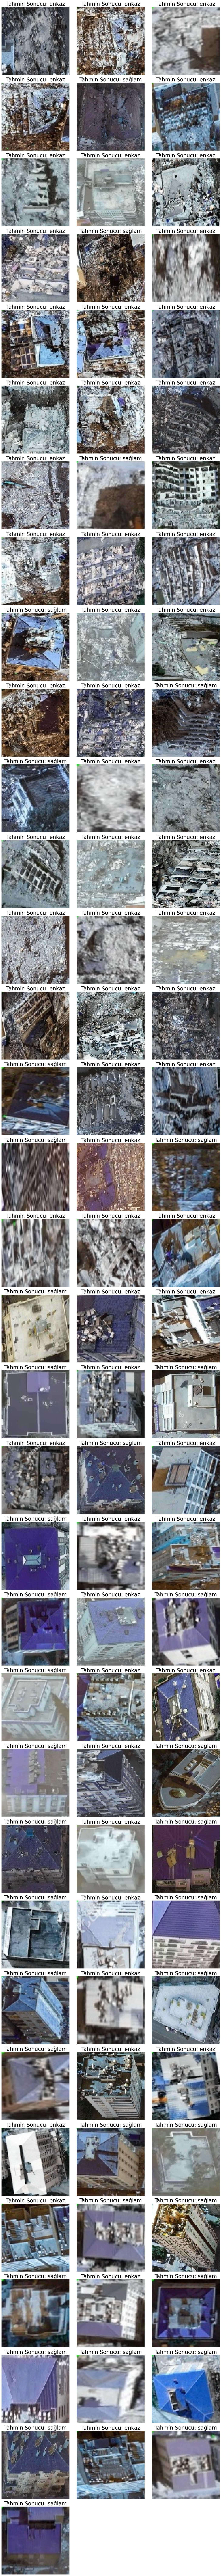

In [ ]:
import matplotlib.pyplot as plt
import math
# Determine the number of rows and columns for subplot layout
num_images = len(X7)
num_rows = math.ceil(num_images / 3)
num_cols = min(num_images, 3)

# Display images with predicted labels
plt.figure(figsize=(15, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X7[i])
    plt.title("Tahmin Sonucu: {}".format(class_labels[predicted_labels[i]]),fontsize=25)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')